In [2]:
import pandas as pd
df=pd.read_csv("spam.csv",encoding='latin-1')
df.shape

(5572, 5)

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4150,ham,ÌÏ comin to fetch us oredi...,NaN,NaN,NaN
3189,ham,Hi neva worry bout da truth coz the truth will...,NaN,NaN,NaN
1356,ham,U ned to convince him tht its not possible wit...,NaN,NaN,NaN


# 1.Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.isnull().any(axis=0)

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [9]:
df.isnull().any(axis=1)

0       True
1       True
2       True
3       True
4       True
        ... 
5567    True
5568    True
5569    True
5570    True
5571    True
Length: 5572, dtype: bool

In [10]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [11]:
#drop the last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.shape

(5572, 2)

In [13]:
df.columns.to_list()

['v1', 'v2']

In [14]:
df.sample(2)

,v1,v2
4832,spam,"New Mobiles from 2004, MUST GO! Txt: NOKIA to ..."
4027,ham,Lol its ok I didn't remember til last nite


In [15]:
df.sample(4)

,v1,v2
4221,ham,Yo you around? A friend of mine's lookin to pi...
1013,ham,Just buy a pizza. Meat lovers or supreme. U ge...
1857,ham,I hate when she does this. She turns what shou...
1919,ham,Yar i wanted 2 scold u yest but late already.....


In [16]:
#Rename the columns as v1->target and v2->text

In [17]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [18]:
df.sample(3)

,target,text
2864,ham,He says hi and to get your ass back to south t...
3941,ham,She's borderline but yeah whatever.
691,ham,Sorry to trouble u again. Can buy 4d for my da...


In [19]:
#2.EDA
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [21]:
#convert categorical column to numeric: using Label encoder
#import LabelEncoder

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['target']=encoder.fit_transform(df['target'])

In [25]:
df.head(4)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [26]:
df['target'].unique()

array([0, 1])

In [27]:
df.columns

Index(['target', 'text'], dtype='object')

In [28]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [29]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [30]:
#check for duplicate values
df.duplicated().sum()

403

In [31]:
#remove duplicate values
df=df.drop_duplicates(keep='first')

In [32]:
df.duplicated().sum()

0

In [33]:
5572-403

5169

In [34]:
df.shape

(5169, 2)

In [35]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

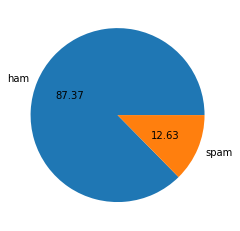

In [36]:
#plot the ratio of ham vs spam
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [37]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [38]:
df['num_characters']=df['text'].apply(len)

In [39]:
df.head(6)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148


In [40]:
#from nltk.corpus import word_tokenize
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [41]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [42]:
df["num_setntences"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [43]:
df.head(4)

,target,text,num_characters,num_words,num_setntences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [44]:
#describe
df[df['target']==0][['num_characters','num_words','num_setntences']].describe()

,num_characters,num_words,num_setntences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
#ham
df[df['target']==0][['num_characters','num_words','num_setntences']].describe()

,num_characters,num_words,num_setntences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
#spam
df[df['target']==1][['num_characters','num_words','num_setntences']].describe()

,num_characters,num_words,num_setntences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


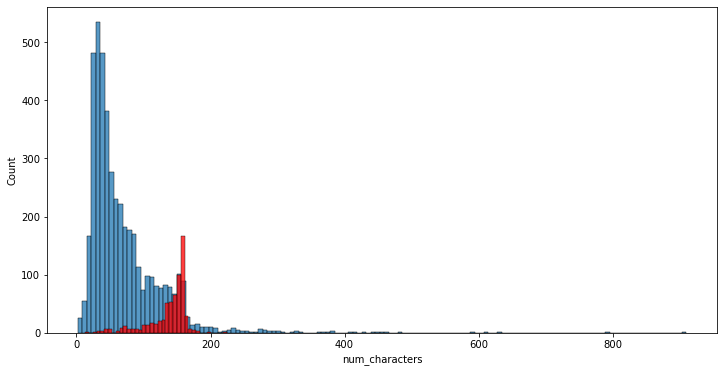

In [47]:
plt.figure(figsize=(12,6))
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

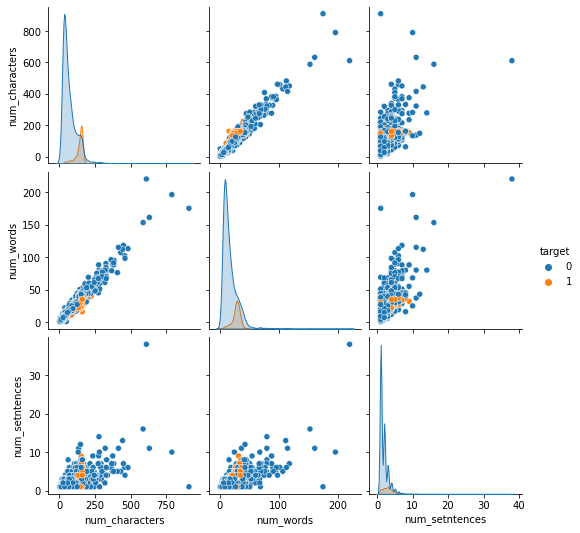

In [48]:
sns.pairplot(df,hue='target')
plt.show()

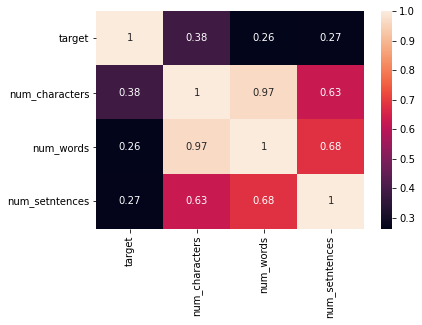

In [49]:
#coorelation
df.corr()
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:>

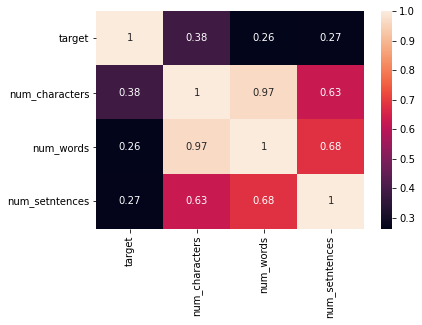

In [50]:
sns.heatmap(df.corr(),annot=True)

In [51]:
#3. Data Preprocessing
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming

In [52]:
#data preprocessing: lower
def transform_text(text):
    text=text.lower()
    return text
transform_text("NLP class Welcomes To YOU ALL")

'nlp class welcomes to you all'

In [53]:
#tokenization
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    return text
transform_text("NLP class Welcomes To YOU ALL")

['nlp', 'class', 'welcomes', 'to', 'you', 'all']

In [54]:
#removing special characters
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y
transform_text("NLP class Welcomes To #YOU ALL@")

['nlp', 'class', 'welcomes', 'to', 'you', 'all']

In [55]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [56]:
#punctuation
import string
string.punctuation
print(len(string.punctuation))

32


In [57]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [58]:
#final method transfor_text
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [59]:
# Alternative method using Regular Expression
'''import re
corpus=[]
for i in range(len(df)):
  review=re.sub("[^a-zA-Z]"," ",df['text'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)
  '''


'import re\ncorpus=[]\nfor i in range(len(df)):\n  review=re.sub("[^a-zA-Z]"," ",df[\'text\'][i])\n  review=review.lower()\n  review=review.split()\n  review=[ps.stem(word) for word in review if not word in stopwords.words(\'english\')]\n  review=\' \'.join(review)\n  corpus.append(review)\n  '

In [60]:
df['transformed_text'] = df['text'].apply(transform_text)

In [61]:
df.sample(4)

,target,text,num_characters,num_words,num_setntences,transformed_text
370,0,Hello my boytoy ... Geeee I miss you already a...,129,32,3,hello boytoy geeee miss alreadi woke wish bed ...
475,0,Ok I'm gonna head up to usf in like fifteen mi...,51,13,1,ok gon na head usf like fifteen minut
2911,0,You didn't have to tell me that...now i'm thin...,89,23,2,tell think plu go stop run
2419,1,SMS SERVICES For your inclusive text credits p...,152,22,1,sm servic inclus text credit pl gotto login 3q...


In [78]:
print(df['transformed_text'])

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object


# Bag of words Method

In [62]:
#Conversion of text into numeric vector using BOW
#Try for tfidf
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=500)

In [63]:
X=cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 500)

In [64]:
df.head(3)

,target,text,num_characters,num_words,num_setntences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [65]:
y = df['target'].values

In [66]:
#Splitting of dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [67]:
#4.Model Building using naive bayes classifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [68]:
# Using GaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7059961315280464
[[594 291]
 [ 13 136]]
0.3185011709601874


In [69]:
# Using MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[875  10]
 [ 19 130]]
0.9285714285714286


In [70]:
# Using BernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9787234042553191
[[883   2]
 [ 20 129]]
0.9847328244274809


# TF-IDF METHOD

In [82]:
# Find the accuracy score uding tfidf vectorizer
'''
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)
'''

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)
response=tfidf.fit_transform(df['transformed_text'])
print(response)

  (0, 2366)	0.24065031803560438
  (0, 855)	0.20168871041461306
  (0, 432)	0.3671769313295521
  (0, 1112)	0.3671769313295521
  (0, 2440)	0.3038843886691715
  (0, 866)	0.24354207752398288
  (0, 351)	0.3671769313295521
  (0, 233)	0.33311170524469924
  (0, 505)	0.33967420337894105
  (0, 1604)	0.2975341834470628
  (0, 837)	0.1744286779337019
  (1, 1482)	0.5595132867202757
  (1, 2407)	0.44069449322829846
  (1, 1078)	0.4821082418590636
  (1, 1119)	0.4166158262729948
  (1, 1473)	0.2945100033142513
  (2, 195)	0.22211350754601883
  (2, 1688)	0.22089571875730865
  (2, 2241)	0.16454895041755596
  (2, 1981)	0.2731715701158446
  (2, 1673)	0.22337403438726844
  (2, 1706)	0.2114712457159792
  (2, 2117)	0.15478072997867184
  (2, 1276)	0.20796394213532782
  (2, 2170)	0.3036076352537658
  :	:
  (5164, 436)	0.2625114363554713
  (5164, 1650)	0.27434944088905094
  (5164, 1553)	0.29560611065398873
  (5165, 668)	0.6620846813862451
  (5165, 775)	0.5762417234610164
  (5165, 959)	0.3768639921385529
  (5165, 837)

In [83]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 2500)

In [84]:
y = df['target'].values

In [113]:
#Splitting of dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [115]:
#4.Model Building using naive bayes classifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [116]:
# Using GaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8665377176015474
[[1168  174]
 [  33  176]]
0.5028571428571429


In [117]:
# Using MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9671179883945842
[[1341    1]
 [  50  159]]
0.99375


In [118]:
# Using BernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9761444229529336
[[1340    2]
 [  35  174]]
0.9886363636363636
